In [20]:
# Packages laden
import pandas as pd
import numpy as np
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.backend import binary_crossentropy
from matplotlib import pyplot as plt
from math import sqrt

In [21]:
# laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True,)

In [22]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [23]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR
ZR_46=ZR[-400:]
ZR_12=ZR[-100:]

In [24]:
# Preprocessing der Rohdaten: 100%
ZR_100new=np.atleast_2d(ZR_100)
if ZR_100new.shape[0]==1:
    ZR_100new=ZR_100new.T
nb_samples_100, nb_series_100 = ZR_100new.shape

In [25]:
# Preprocessing der Rohdaten: 46%
ZR_46new=np.atleast_2d(ZR_46)
if ZR_46new.shape[0]==1:
    ZR_46new=ZR_46new.T
nb_samples_46, nb_series_46 = ZR_46new.shape

In [26]:
# Preprocessing der Rohdaten: 12%
ZR_12new=np.atleast_2d(ZR_12)
if ZR_12new.shape[0]==1:
    ZR_12new=ZR_12new.T
nb_samples_12, nb_series_12 = ZR_12new.shape

In [27]:
# Einteilung in Trainings- und Testdaten: nicht mehr ZR sondern X --> X_train etc
test_size_100=int(0.3*nb_samples_100)
train_100, test_100 = ZR_100[:-test_size_100], ZR_100[-test_size_100:] 

test_size_46=int(0.35*nb_samples_46)
train_46, test_46 = ZR_46[:-test_size_46], ZR_46[-test_size_46:]

test_size_12=int(0.35*nb_samples_12)
train_12, test_12 = ZR_12[:-test_size_12], ZR_12[-test_size_12:]

In [28]:
# Shape des Input und Outputs anpassen: 100%
look_forward=1
window_size=12
# Trainingsdaten
Xtrain_100=np.atleast_3d(np.array([train_100[start:start+window_size] for start in range(0, train_100.shape[0]-(window_size+look_forward))]))
ytrain_100=train_100[window_size+look_forward:]
qtrain_100=np.atleast_3d([train_100[-(window_size):]])
print(qtrain_100.shape, ytrain_100.shape, Xtrain_100.shape)

# Testdaten
Xtest_100=np.atleast_3d(np.array([test_100[start:start+window_size] for start in range(0, test_100.shape[0]-(window_size+look_forward))]))
ytest_100=test_100[window_size+look_forward:]
qtest_100=np.atleast_3d([test_100[-(window_size):]])
print(qtest_100.shape, ytest_100.shape, Xtest_100.shape)

(1, 12, 1) (592,) (592, 12, 1)
(1, 12, 1) (245,) (245, 12, 1)


In [29]:
# Shape des Input und Outputs anpassen: 46%
# Trainingsdaten
Xtrain_46=np.atleast_3d(np.array([train_46[start:start+window_size] for start in range(0, train_46.shape[0]-(window_size+look_forward))]))
ytrain_46=train_46[window_size+look_forward:]
qtrain_46=np.atleast_3d([train_46[-(window_size):]])
print(qtrain_46.shape, ytrain_46.shape, Xtrain_46.shape)

# Testdaten
Xtest_46=np.atleast_3d(np.array([test_46[start:start+window_size] for start in range(0, test_46.shape[0]-(window_size+look_forward))]))
ytest_46=test_46[window_size+look_forward:]
qtest_46=np.atleast_3d([test_46[-(window_size):]])
print(qtest_46.shape, ytest_46.shape, Xtest_46.shape)

(1, 12, 1) (247,) (247, 12, 1)
(1, 12, 1) (127,) (127, 12, 1)


In [30]:
# Shape des Input und Outputs anpassen: 12%
# Trainingsdaten
Xtrain_12=np.atleast_3d(np.array([train_12[start:start+window_size] for start in range(0, train_12.shape[0]-(window_size+look_forward))]))
ytrain_12=train_12[window_size+look_forward:]
qtrain_12=np.atleast_3d([train_12[-(window_size):]])
print(qtrain_12.shape, ytrain_12.shape, Xtrain_12.shape)

# Testdaten
Xtest_12=np.atleast_3d(np.array([test_12[start:start+window_size] for start in range(0, test_12.shape[0]-(window_size+look_forward))]))
ytest_12=test_12[window_size+look_forward:]
qtest_12=np.atleast_3d([test_12[-(window_size):]])
print(qtest_12.shape, ytest_12.shape, Xtest_12.shape)

(1, 12, 1) (52,) (52, 12, 1)
(1, 12, 1) (22,) (22, 12, 1)


In [31]:
# Modell zusammenbauen: 
nb_filter_1=32
nb_filter_2=64
nb_filter_3=64
filter_length=2
nb_input_series=1
nb_outputs=1
model= Sequential()
model.add(Convolution1D(nb_filter=nb_filter_1, filter_length=filter_length, activation='relu', 
                        input_shape=(window_size, nb_input_series)))
model.add(Convolution1D(nb_filter=nb_filter_2, filter_length=filter_length, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(nb_outputs, activation='linear')) 
model.compile(loss='mse', optimizer='adam', metrics=['mae']) 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(12, 1), filters=32, kernel_size=2)`
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=2)`
  # This is added back by InteractiveShellApp.init_path()


In [32]:
# Modellzusammenfassung
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 11, 32)            96        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 321       
Total params: 4,577
Trainable params: 4,577
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [34]:
# Modellanpassen: 100%
history_reg=model.fit(Xtrain_100, ytrain_100, epochs=200, batch_size=25, validation_data=(Xtest_100, ytest_100))

Train on 592 samples, validate on 245 samples
Epoch 1/200
592/592 [==============================] - 1s 1ms/step - loss: 4221637611.5676 - mean_absolute_error: 61572.5020 - val_loss: 393106725.8776 - val_mean_absolute_error: 19403.5820
Epoch 2/200
592/592 [==============================] - 0s 275us/step - loss: 200853893.8041 - mean_absolute_error: 11909.6371 - val_loss: 33936297.5102 - val_mean_absolute_error: 4975.2057
Epoch 3/200
592/592 [==============================] - 0s 272us/step - loss: 37253436.7416 - mean_absolute_error: 4831.1279 - val_loss: 16891775.9184 - val_mean_absolute_error: 3300.2070
Epoch 4/200
592/592 [==============================] - 0s 287us/step - loss: 26130026.2517 - mean_absolute_error: 4041.2397 - val_loss: 16651714.9388 - val_mean_absolute_error: 3307.6009
Epoch 5/200
592/592 [==============================] - 0s 257us/step - loss: 24657663.7196 - mean_absolute_error: 3930.6632 - val_loss: 16594079.2245 - val_mean_absolute_error: 3390.6558
Epoch 6/200
59

Epoch 88/200
592/592 [==============================] - 0s 296us/step - loss: 17339104.4983 - mean_absolute_error: 3236.6139 - val_loss: 8888003.5102 - val_mean_absolute_error: 2435.1901
Epoch 89/200
592/592 [==============================] - 0s 368us/step - loss: 16141111.4780 - mean_absolute_error: 3199.5143 - val_loss: 9910818.3776 - val_mean_absolute_error: 2532.7807
Epoch 90/200
592/592 [==============================] - 0s 358us/step - loss: 17392045.6723 - mean_absolute_error: 3303.9651 - val_loss: 7894590.8673 - val_mean_absolute_error: 2304.0861
Epoch 91/200
592/592 [==============================] - 0s 382us/step - loss: 16078406.3235 - mean_absolute_error: 3180.0046 - val_loss: 7878074.9898 - val_mean_absolute_error: 2288.4467
Epoch 92/200
592/592 [==============================] - 0s 341us/step - loss: 15624820.4274 - mean_absolute_error: 3118.9884 - val_loss: 7768004.4388 - val_mean_absolute_error: 2274.4892
Epoch 93/200
592/592 [==============================] - 0s 390us/

Epoch 132/200
592/592 [==============================] - 0s 503us/step - loss: 13828338.8547 - mean_absolute_error: 2924.5973 - val_loss: 7390746.0102 - val_mean_absolute_error: 2180.2142
Epoch 133/200
592/592 [==============================] - 0s 481us/step - loss: 13784200.4502 - mean_absolute_error: 2934.8520 - val_loss: 7353616.7653 - val_mean_absolute_error: 2194.7808
Epoch 134/200
592/592 [==============================] - 0s 475us/step - loss: 14153739.0287 - mean_absolute_error: 2965.9750 - val_loss: 9130834.7857 - val_mean_absolute_error: 2334.1303
Epoch 135/200
592/592 [==============================] - 0s 426us/step - loss: 14528096.9814 - mean_absolute_error: 2988.9037 - val_loss: 7736373.3571 - val_mean_absolute_error: 2184.5678
Epoch 136/200
592/592 [==============================] - 0s 294us/step - loss: 13677359.1824 - mean_absolute_error: 2911.0477 - val_loss: 7393016.0000 - val_mean_absolute_error: 2177.9171
Epoch 137/200
592/592 [==============================] - 0s 

Text(0.5,1,'Loss Curves')

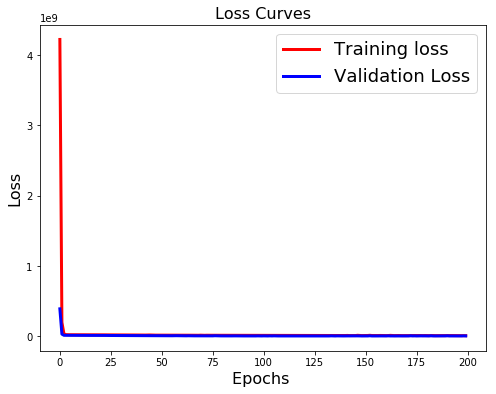

In [35]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

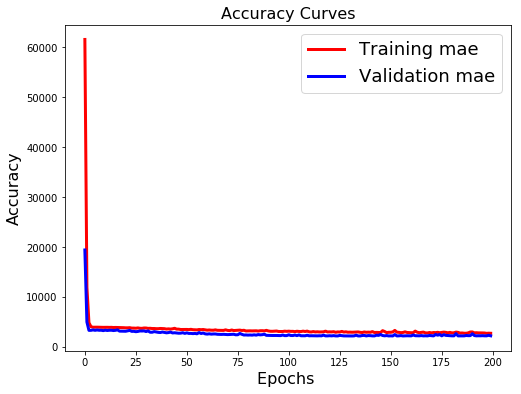

In [36]:
#Plotten der Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['mean_absolute_error'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_mean_absolute_error'],'b',linewidth=3.0)
plt.legend(['Training mae', 'Validation mae'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [37]:
# Vorhersage generieren
predictions_100 = model.predict(Xtest_100)

predictions_train_100=model.predict(Xtrain_100)

In [38]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_100, predictions_100)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_100, predictions_train_100)
print('Train MSE: %.3f' % mse_train)

Test MSE: 8023642.530
Train MSE: 11516627.852


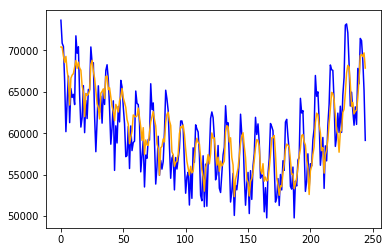

In [39]:
# Abtragen von Vorhersage und Testdaten
plt.plot(ytest_100, color='blue') 
plt.plot(predictions_100, color='orange') 
plt.show()

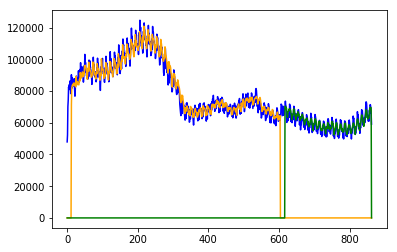

In [40]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(window_size+look_forward-1):len(predictions_train_100)+(window_size+look_forward-1)] = predictions_train_100


# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(predictions_train_100)+2*(window_size+look_forward)-1:len(ZR_100)-1] = predictions_100
     
       
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [59]:
# Replizierbarkeit gewährleisten
np.random.seed(7)

In [60]:
# Modellanpassen: 46%
history_reg=model.fit(Xtrain_46, ytrain_46, epochs=200, batch_size=25, validation_data=(Xtest_46, ytest_46))

Train on 247 samples, validate on 127 samples
Epoch 1/200
247/247 [==============================] - 0s 279us/step - loss: 4377044.6032 - mean_absolute_error: 1662.6649 - val_loss: 5777173.9429 - val_mean_absolute_error: 1964.7890
Epoch 2/200
247/247 [==============================] - 0s 328us/step - loss: 4371865.1336 - mean_absolute_error: 1678.5628 - val_loss: 4849978.1280 - val_mean_absolute_error: 1700.1161
Epoch 3/200
247/247 [==============================] - 0s 283us/step - loss: 4823408.9706 - mean_absolute_error: 1750.1732 - val_loss: 4686303.0453 - val_mean_absolute_error: 1602.7237
Epoch 4/200
247/247 [==============================] - 0s 271us/step - loss: 4982724.8330 - mean_absolute_error: 1808.5155 - val_loss: 5415601.7028 - val_mean_absolute_error: 1867.2795
Epoch 5/200
247/247 [==============================] - 0s 421us/step - loss: 4614562.5972 - mean_absolute_error: 1692.8507 - val_loss: 6796699.9469 - val_mean_absolute_error: 2199.0491
Epoch 6/200
247/247 [========

Epoch 45/200
247/247 [==============================] - 0s 304us/step - loss: 4300395.4170 - mean_absolute_error: 1651.9211 - val_loss: 5342680.2736 - val_mean_absolute_error: 1852.4008
Epoch 46/200
247/247 [==============================] - 0s 284us/step - loss: 4588931.8836 - mean_absolute_error: 1691.5686 - val_loss: 5265522.1398 - val_mean_absolute_error: 1823.9408
Epoch 47/200
247/247 [==============================] - 0s 291us/step - loss: 5072484.6488 - mean_absolute_error: 1769.4880 - val_loss: 5373311.1004 - val_mean_absolute_error: 1864.5533
Epoch 48/200
247/247 [==============================] - 0s 320us/step - loss: 4744046.0607 - mean_absolute_error: 1722.1550 - val_loss: 4716082.8957 - val_mean_absolute_error: 1639.9467
Epoch 49/200
247/247 [==============================] - 0s 291us/step - loss: 4818002.3644 - mean_absolute_error: 1769.1407 - val_loss: 4815337.0669 - val_mean_absolute_error: 1654.9882
Epoch 50/200
247/247 [==============================] - 0s 271us/step 

Epoch 89/200
247/247 [==============================] - 0s 255us/step - loss: 4868995.1134 - mean_absolute_error: 1744.4937 - val_loss: 5541420.3780 - val_mean_absolute_error: 1906.7365
Epoch 90/200
247/247 [==============================] - 0s 336us/step - loss: 4413799.7642 - mean_absolute_error: 1658.7450 - val_loss: 4840651.0650 - val_mean_absolute_error: 1685.2301
Epoch 91/200
247/247 [==============================] - 0s 344us/step - loss: 4716032.9372 - mean_absolute_error: 1725.7746 - val_loss: 5351694.8996 - val_mean_absolute_error: 1850.8510
Epoch 92/200
247/247 [==============================] - 0s 283us/step - loss: 4454805.3573 - mean_absolute_error: 1681.5416 - val_loss: 4725651.7067 - val_mean_absolute_error: 1611.0794
Epoch 93/200
247/247 [==============================] - 0s 288us/step - loss: 4573322.8654 - mean_absolute_error: 1741.2176 - val_loss: 4718919.8327 - val_mean_absolute_error: 1615.0808
Epoch 94/200
247/247 [==============================] - 0s 251us/step 

247/247 [==============================] - 0s 287us/step - loss: 4731771.4575 - mean_absolute_error: 1788.9922 - val_loss: 4945357.0079 - val_mean_absolute_error: 1730.0727
Epoch 176/200
247/247 [==============================] - 0s 279us/step - loss: 4234447.5557 - mean_absolute_error: 1623.0470 - val_loss: 5083867.7913 - val_mean_absolute_error: 1781.3982
Epoch 177/200
247/247 [==============================] - 0s 328us/step - loss: 4213627.0182 - mean_absolute_error: 1635.6759 - val_loss: 6094496.9606 - val_mean_absolute_error: 2038.4435
Epoch 178/200
247/247 [==============================] - 0s 352us/step - loss: 4215123.4069 - mean_absolute_error: 1651.9706 - val_loss: 6146811.4961 - val_mean_absolute_error: 2050.1227
Epoch 179/200
247/247 [==============================] - 0s 340us/step - loss: 4466886.4919 - mean_absolute_error: 1672.0384 - val_loss: 6714227.4567 - val_mean_absolute_error: 2171.3349
Epoch 180/200
247/247 [==============================] - 0s 283us/step - loss: 

Text(0.5,1,'Loss Curves')

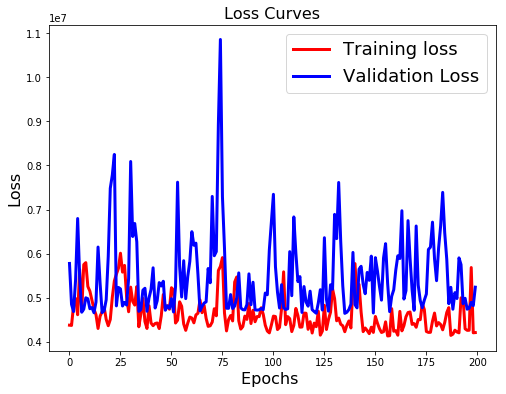

In [61]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

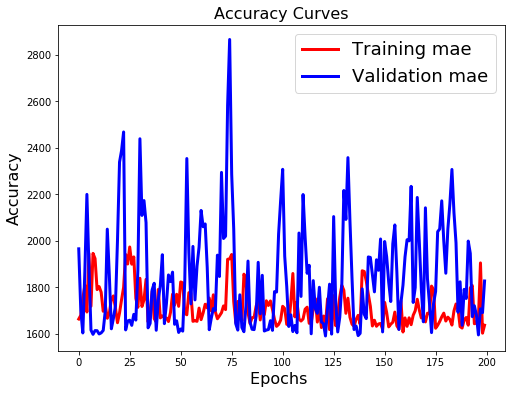

In [62]:
#Plotten der Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['mean_absolute_error'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_mean_absolute_error'],'b',linewidth=3.0)
plt.legend(['Training mae', 'Validation mae'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [63]:
# Vorhersage generieren
predictions_46 = model.predict(Xtest_46)

predictions_train_46=model.predict(Xtrain_46)

In [64]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_46, predictions_46)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_46, predictions_train_46)
print('Train MSE: %.3f' % mse_train)

Test MSE: 5238728.308
Train MSE: 4043690.207


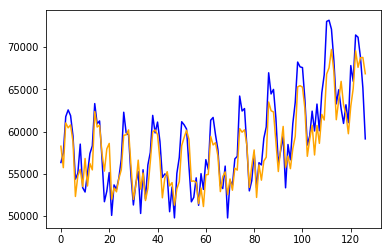

In [65]:
# Abtragen von Vorhersage und Testdaten
plt.plot(ytest_46, color='blue') 
plt.plot(predictions_46, color='orange')
plt.show()

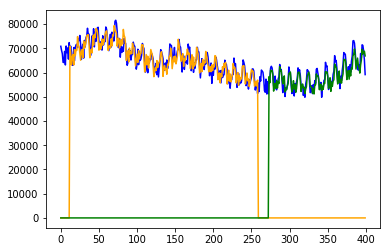

In [66]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_46)
trainPredictPlot[:]=[0]*len(ZR_46)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_46),1)
trainPredictPlot[(window_size+look_forward-1):len(predictions_train_46)+(window_size+look_forward-1)] = predictions_train_46

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_46)
testPredictPlot[:]=[0]*len(ZR_46)
testPredictPlot = testPredictPlot.reshape(len(ZR_46),1)
testPredictPlot[len(predictions_train_46)+2*(window_size+look_forward):len(ZR)-1] = predictions_46
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_46, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [67]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [68]:
# Modellanpassen: 12% 
history_reg=model.fit(Xtrain_12, ytrain_12, nb_epoch=25, batch_size=2, validation_data=(Xtest_12, ytest_12))

Train on 52 samples, validate on 22 samples
Epoch 1/25
52/52 [==============================] - 0s 2ms/step - loss: 5090389.0547 - mean_absolute_error: 1821.1949 - val_loss: 10418378.7528 - val_mean_absolute_error: 2275.9984
Epoch 2/25
26/52 [==============>...............] - ETA: 0s - loss: 3096046.0228 - mean_absolute_error: 1375.5129

C:\Anaconda\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


52/52 [==============================] - 0s 3ms/step - loss: 3510442.4400 - mean_absolute_error: 1425.7278 - val_loss: 10685443.9886 - val_mean_absolute_error: 2392.1037
Epoch 3/25
52/52 [==============================] - 0s 3ms/step - loss: 5243536.3858 - mean_absolute_error: 1914.5270 - val_loss: 12749354.6080 - val_mean_absolute_error: 2968.9510
Epoch 4/25
52/52 [==============================] - 0s 3ms/step - loss: 2815719.2242 - mean_absolute_error: 1278.2049 - val_loss: 8534437.0568 - val_mean_absolute_error: 2179.9872
Epoch 5/25
52/52 [==============================] - 0s 3ms/step - loss: 3156225.6773 - mean_absolute_error: 1480.6677 - val_loss: 15618216.6165 - val_mean_absolute_error: 2948.2713
Epoch 6/25
52/52 [==============================] - 0s 3ms/step - loss: 4145655.2831 - mean_absolute_error: 1681.5695 - val_loss: 22767881.1364 - val_mean_absolute_error: 4351.2674
Epoch 7/25
52/52 [==============================] - 0s 2ms/step - loss: 3756339.8041 - mean_absolute_error:

In [69]:
# Vorhersage generieren
predictions_12 = model.predict(Xtest_12)

predictions_train_12=model.predict(Xtrain_12)

In [70]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_12, predictions_12)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_12, predictions_train_12)
print('Train MSE: %.3f' % mse_train)

Test MSE: 8250848.225
Train MSE: 1946336.881


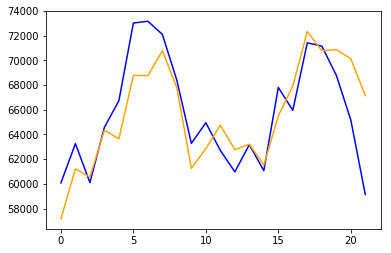

In [71]:
# Abtragen von Vorhersage und Testdaten
plt.plot(ytest_12, color='blue') 
plt.plot(predictions_12, color='orange') 
plt.show()

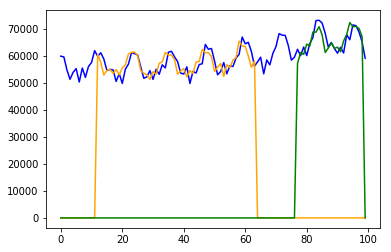

In [72]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_12)
trainPredictPlot[:]=[0]*len(ZR_12)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_12),1)
trainPredictPlot[(window_size+look_forward-1):len(predictions_train_12)+(window_size+look_forward-1)] = predictions_train_12

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_12)
testPredictPlot[:]=[0]*len(ZR_12)
testPredictPlot = testPredictPlot.reshape(len(ZR_12),1)
testPredictPlot[len(predictions_train_12)+2*(window_size+look_forward)-1:len(ZR_12)-1] = predictions_12
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_12, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()